# Imprting packages and reading data

In [6]:
import obspy
from obspy import UTCDateTime
import numpy as np
from obspy.clients.fdsn.client import Client
import matplotlib.pyplot as plt
import os
import pandas as pd
import concurrent.futures

In [2]:
df = pd.read_csv("/home/sairaman/Desktop/stead_dataset/csv_files/updated_chunk2.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/home/sairaman/Desktop/stead_dataset/csv_files/updated_chunk2.csv'

# EDA

/tmp/ipykernel_7738/4030999152.py:2: DtypeWarning: Columns (7,11,13,14,15,18,19,20,21,22,24,25,26,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/hp/Desktop/stead_dataset/merged.csv")


<AxesSubplot:xlabel='source_magnitude', ylabel='Count'>

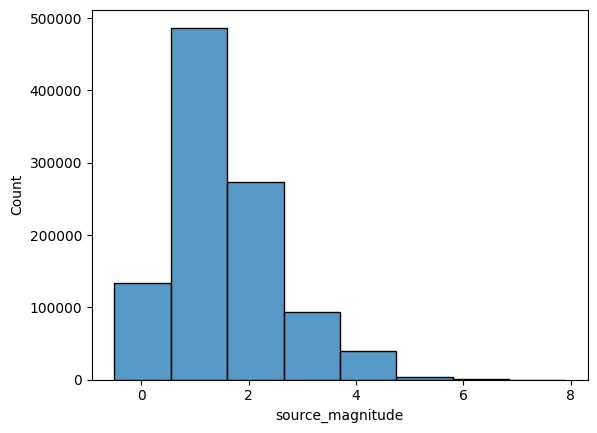

In [4]:
import seaborn as sns
df = pd.read_csv("/home/hp/Desktop/stead_dataset/merged.csv")
sns.histplot(data=df,x='source_magnitude',bins=8)

# Plotting spectrogram from IRIS

In [25]:
# plt.psd(tr.data,Fs=100,NFFT=256) #,cmap='gray',vmin=-210,vmax=-80)
# plt.specgram(tr.data,Fs=100,NFFT=256,cmap='gray',vmin=10,vmax=90)
def get_data(network_code,receiver_code,receiver_type,spectrogram_start_time,spectrogram_end_time):
    try:
        client = Client("IRIS")
        st =  client.get_waveforms(network = network_code,
                                station = receiver_code, location = "*", channel = receiver_type + 'Z', 
                                starttime = UTCDateTime(spectrogram_start_time), 
                                endtime = UTCDateTime(spectrogram_end_time),  
                                attach_response=True)
        pre_filt = [0.001, 0.005, 45, 50]
        st.remove_response(pre_filt=pre_filt, output="VEL")
        #st.plot()
        return st[0]

    except:
        print("Data is not available")
        return -1

In [ ]:
for network_code, receiver_code, receiver_type, spectrogram_start_time, spectrogram_end_time, mag in zip(df['network_code'].to_list(), df['receiver_code'].to_list(), \
                                                                                                df['receiver_type'].to_list(), df['spectrogram_start_time'].tolist(), \
                                                                                                df['spectrogram_end_time'].to_list(),df['source_magnitude'].to_list()):

    print(network_code, receiver_code, receiver_type, spectrogram_start_time, spectrogram_end_time, mag)
    count = 0
    tr = get_data(network_code,receiver_code,receiver_type,spectrogram_start_time,spectrogram_end_time)
    if tr != -1:
        tr.detrend("linear")
        tr.filter('bandpass', freqmin=2, freqmax=10, corners=4, zerophase=True)
        tr.plot()
        tr.spectrogram(log=True,cmap='grey')

        #plt.psd(tr.data,Fs=100,NFFT=256) #,cmap='gray',vmin=-210,vmax=-80)
        #plt.specgram(tr.data,Fs=100,NFFT=256,cmap='gray', vmin=-250,vmax=-150)
        #plt.specgram(tr.data,Fs=100,cm,NFFT=256,cmap='gray', vmin=-10,vmax=25)
        #plt.show()
    else:
        print("Not available")

# Plotting spectrogram Locally

In [2]:
import os
import obspy

In [14]:
file_list = os.listdir("/home/sairaman/Desktop/stead-dataset/data/waveforms/chunk2_ir_removed")
file_list = file_list[0:10]
'''os.chdir("/mnt/home/chunk2_images")
def magnitude(file_name,df):
    sl_no = int(file_name.split("_")[-1].split(".")[0])
'''
def spec_plot(file_list):
    for file_name in file_list:
            os.chdir("/home/sairaman/Desktop/stead-dataset/data/waveforms/chunk2_ir_removed")
            st = obspy.read(file_name)
            tr = st[0]
            tr.detrend("linear")
            tr.filter('bandpass', freqmin=2, freqmax=10, corners=4, zerophase=True)
            tr.spectrogram(log=True,cmap='grey') #,outfile=file_name+'.jpeg',fmt='jpeg')
            tr.plot()

In [ ]:
def spec_plot(file_list):
    for file_name in file_list:
            print(file_name)
            st = obspy.read(file_name)

spec_plot(file_list)

In [20]:
import os
import obspy
import matplotlib.pyplot as plt
file_list = os.listdir("/home/sairaman/Desktop/stead-dataset/data/waveforms/chunk2_ir_removed")
file_list = file_list[0:30]
'''os.chdir("/mnt/home/chunk2_images")
def magnitude(file_name,df):
    sl_no = int(file_name.split("_")[-1].split(".")[0])
'''

def spec_plot(file_list):
    #os.chdir("")
    for file_name in file_list:
            
            st = obspy.read("/home/sairaman/Desktop/stead-dataset/data/waveforms/chunk2_ir_removed/" + file_name)
            st.detrend("linear")
            st.filter('bandpass', freqmin=2, freqmax=10, corners=4, zerophase=True)
            st.spectrogram(log=True,outfile="/home/sairaman/Desktop/stead-dataset/data/images/EQ/" + file_name.split(".")[0] +'.jpeg',fmt='jpeg')
            plt.close()         
            #obspy.spectrogram(st,log=True,outfile="/home/sairaman/Desktop/stead-dataset/data/images/EQ/" + file_name.split(".")[0] +'.jpeg',fmt='jpeg')
            #st.plot()


spec_plot(file_list)


TypeError: Unknown format for file /home/sairaman/Desktop/stead-dataset/data/waveforms/chunk2_ir_removed/PB_B082_292_124609.SAC

inv = fdsn_client.get_stations(network='NZ', station='BFZ', location='10', channel='HHZ',starttime=t1, endtime=t2, level='response')
tr.spectrogram(log=True,title=file_name + str(magnitude(file_name,df)))
            plt.psd(tr.data,Fs=100,NFFT=256) #,cmap='gray',vmin=-210,vmax=-80)
            plt.specgram(tr.data,Fs=100,NFFT=256,cmap='gray', vmin=-250,vmax=-150)
            plt.specgram(tr.data,Fs=100,cm,NFFT=256,cmap='gray', vmin=-10,vmax=25)
        except:
           print("Error in response removal")
           return -1

In [ ]:
file_list = os.listdir("/mnt/home/chunk1")
file_list
os.chdir("/mnt/home/chunk2")

st = obspy.read('PB_B065_103_55683.SAC')
client = Client('IRIS')
inv = client.get_stations(
    network=st[0].stats.network, station=st[0].stats.station, location="*", channel=st[0].stats.channel,
    starttime=st[0].stats.starttime, endtime=st[0].stats.endtime, level='response')
pre_filt = [0.001, 0.005, 45, 50]
st.plot()
st.remove_response(inventory = inv ,pre_filt=pre_filt, output="VEL")
st[0].filter('bandpass', freqmin=2, freqmax=10, corners=4, zerophase=True)
st.plot()

In [ ]:
st = obspy.read('CN_ILON_15_50705.SAC')
st[0].stats

# IR removal

In [11]:
file_list = os.listdir("/mnt/home/chunk2")
#file_list= file_list[0:10]
#def magnitude(file_name,df):
    #sl_no = int(file_name.split("_")[-1].split(".")[0])

def ir_remove(file_list):
    os.chdir("/mnt/home/chunk2_ir_removed")
    for file_name in file_list:
        try:
            client = Client("IRIS")
            st = obspy.read("/mnt/home/chunk2/"+file_name)
            inv = client.get_stations(network=st[0].stats.network, station=st[0].stats.station, 
                                      location="*", channel=st[0].stats.channel,
                                      starttime=st[0].stats.starttime, endtime=st[0].stats.endtime, 
                                      level='response')
            pre_filt = [0.001, 0.005, 45, 50]
            st_copied = st.copy()
            st_copied.remove_response(inventory = inv,pre_filt=pre_filt, output="VEL")
            tr = st_copied[0]
            tr.write(file_name, format="SAC")
            print('IR done for ', file_name)
           #tr.detrend("linear")
            #tr.filter('bandpass', freqmin=2, freqmax=10, corners=4, zerophase=True)
            #tr.spectrogram(log=True,cmap='grey',outfile=file_name+'.jpeg',fmt='jpeg'
            #tr.plot()
        except:
            print(f'failed to remove IR of {file_name}')

In [ ]:
ir_remove(file_list)

In [6]:
file_list = os.listdir("/mnt/home/chunk2")
file_list

['PB_B067_193_60416.SAC',
 'SN_AMD_270_24397.SAC',
 'TA_109C_139_292.SAC',
 'PB_B047_217_46585.SAC',
 'PB_B082_312_100119.SAC',
 'PB_B082_186_123039.SAC',
 'ZQ_AAM3_139_3724.SAC',
 'PB_B078_318_68749.SAC',
 'PB_B081_246_79426.SAC',
 'HT_ALN_38_23234.SAC',
 'PB_B065_71_55606.SAC',
 'HV_AHUD_172_8616.SAC',
 'PB_B082_143_102343.SAC',
 'AV_AKS_102_18026.SAC',
 'PB_B081_186_94485.SAC',
 'KR_ARLS_87_31676.SAC',
 'PB_B081_246_95440.SAC',
 'PB_B081_279_90795.SAC',
 'PB_B082_341_100401.SAC',
 'PB_B081_180_94394.SAC',
 'PR_AOPR_32_29106.SAC',
 'PB_B082_10_120331.SAC',
 'PB_B067_279_58900.SAC',
 'PB_B082_224_96974.SAC',
 'PB_B081_206_78914.SAC',
 'PB_B046_18_44509.SAC',
 'PB_B082_257_103909.SAC',
 'PB_B081_128_89224.SAC',
 'AV_AKRB_44_17301.SAC',
 'PB_B081_78_92799.SAC',
 'PB_B082_300_114903.SAC',
 'PB_B081_242_90412.SAC',
 'PB_B082_289_124563.SAC',
 'PB_B018_13_41371.SAC',
 'KZ_ABKAR_144_4715.SAC',
 'PB_B081_28_87731.SAC',
 'PB_B081_15_73238.SAC',
 'PB_B013_18_39507.SAC',
 'PB_B082_55_110161.SAC